In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [3]:
fraud=pd.read_csv("Fraud_check.csv")

In [4]:
fraud["income"]="" # consider new variable "income" to catagorize >30K & <30K taxable income under good and risky parameter 

In [5]:
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
fraud.loc[fraud["Taxable.Income"]>30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [6]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [7]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [8]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [10]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [11]:
# model.fit function does not consider string , so attribute (undergrad, Marital status, Urban, income)  converted into int 
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])
fraud['income']=label_encoder.fit_transform(fraud['income'])

In [12]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [14]:
x=fraud.iloc[:,0:5]
y=fraud.iloc[:,5]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [17]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [18]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

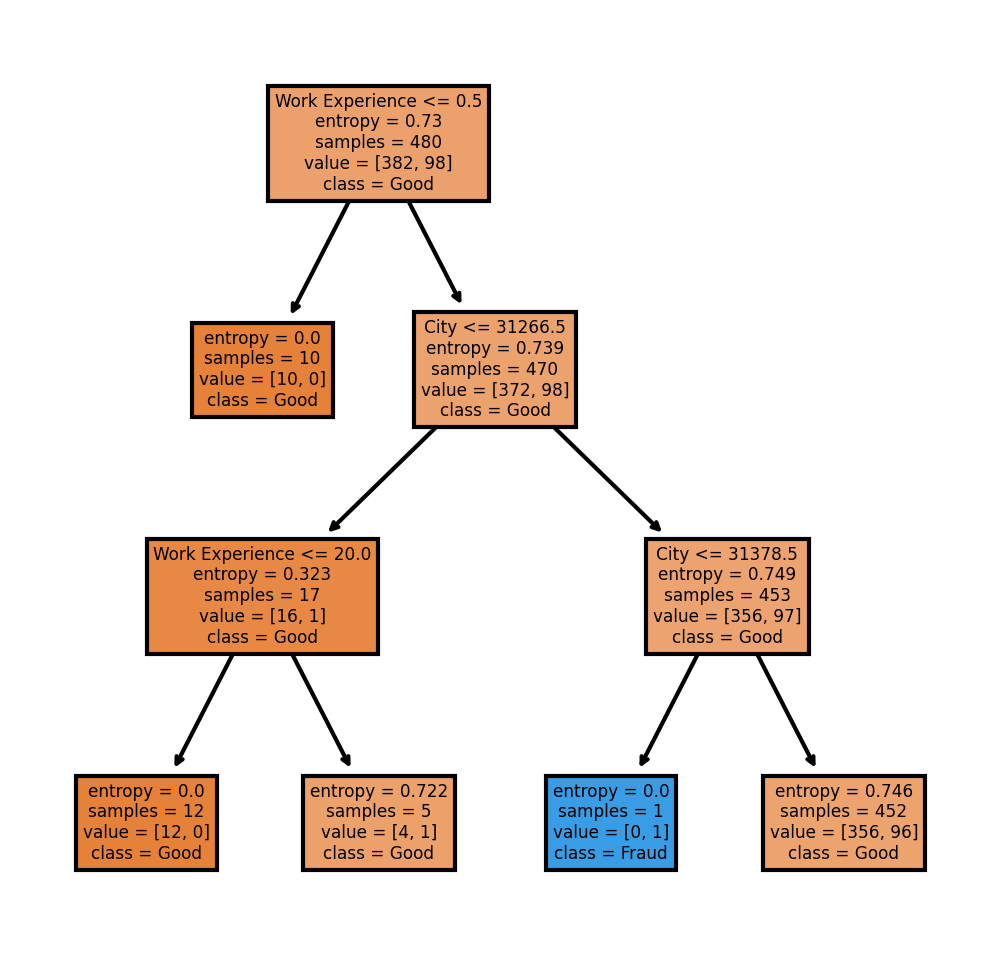

In [19]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model);
fn=['Under Grad','Marital status','City','Work Experience','Residence']
cn=['Good','Fraud']
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);